In [1]:
# Ignore SQLITE warnings related to Decimal numbers in the Chinook database
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()


In [7]:
# reflect the database tables
Base.prepare(autoload_with=engine)


# Print all of the classes mapped to the Base
Base.classes.keys()



['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [10]:
row_m = session.query(Measurement).first()
row_m.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fcd682ff2b0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'id': 1,
 'prcp': 0.08}

In [11]:
row_s = session.query(Station).first()
row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fcd994b50d0>,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

In [12]:
# View all of the classes that automap found
inspector = inspect(engine)

# Get a list of column names and types for Class Measurement
columns_m = inspector.get_columns('Measurement')
for c in columns_m:
    print(c['name'], c['type'])



id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [14]:
# Get a list of column names and types for Class Station

columns_s= inspector.get_columns('Station')
for c in columns_s:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

# Exploratory Precipitation Analysis

In [16]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(19550,)]

In [17]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [18]:
print(dt.date.today())

2023-03-09


In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)


Query Date:  2016-08-23


In [20]:
# Perform a query to retrieve the data and precipitation scores

data_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).\
    order_by(Measurement.date).all()

data_prcp

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [21]:
# Save the query results as a Pandas DataFrame and set the index to the date column
data_prcp_df = pd.DataFrame(data_prcp, columns=['Date', 'Precipitation'])

# Sort the dataframe by date and set index
data_prcp_df = data_prcp_df.sort_values(['Date'], ascending=True)
score_prcp_df = data_prcp_df.set_index('Date')

# drop null values
score_prcp_df = score_prcp_df.dropna(how='any')

score_prcp_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


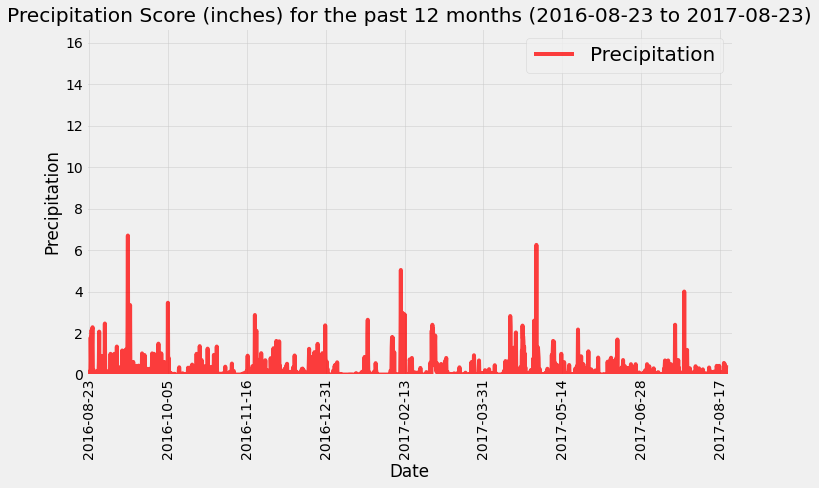

In [22]:
# Use Pandas Plotting with Matplotlib to plot the data
# x_axis

#Plot bar graph
score_prcp_df.plot(figsize=(10,7), color='r', alpha=0.75, rot=90)

# Sets the x limits of the current chart
plt.xlim(-10, len(score_prcp_df)+20)

# Sets the y limits of the current chart
plt.ylim(0, max(score_prcp_df['Precipitation'])+10)

plt.grid(True, alpha = 0.5)

# Give our chart some labels and a tile

plt.title("Precipitation Score (inches) for the past 12 months (2016-08-23 to 2017-08-23)")
plt.xlabel("Date")
plt.ylabel("Precipitation")

# Save an image of the chart and print it to the screen
plt.tight_layout()
plt.legend(loc='upper right', fontsize=20)
plt.savefig("../images/score_prcp_df.png")
plt.show()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
score_prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(Station.station).count()
total_station

print(f'There are {total_station} stations in the data set.')

There are 9 stations in the data set.


In [34]:
# Design a query to find the most active Measurements (i.e. what Measurements have the most rows?)
# List the Measurements and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by((func.count(Measurement.station)).desc()).all()
active_station

most_active_station = active_station[0][0]

print(f'{most_active_station} have the most active Meaurements') 

USC00519281 have the most active Meaurements


In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
       func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]

temperatures = session.query(*sel).\
       filter(Measurement.station == most_active_station).all()
temperatures_min = temperatures [0][1]
temperatures_max = temperatures [0][2]
temperatures_avg = temperatures [0][3]

print(f'Lowest Temperature : {temperatures_min}\
      Highest Temperature : {temperatures_max}\
      Average temperature : {round(temperatures_avg, 2)}')

Lowest Temperature : 54.0      Highest Temperature : 85.0      Average temperature : 71.66


In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data_temperature = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= query_date).\
    filter(Measurement.station == most_active_station).\
    order_by(Measurement.date).all()

data_temperature

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

In [28]:
# Save the query results as a Pandas DataFrame and set the index to the date column
data_temperature_df = pd.DataFrame(data_temperature)


data_temperature_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


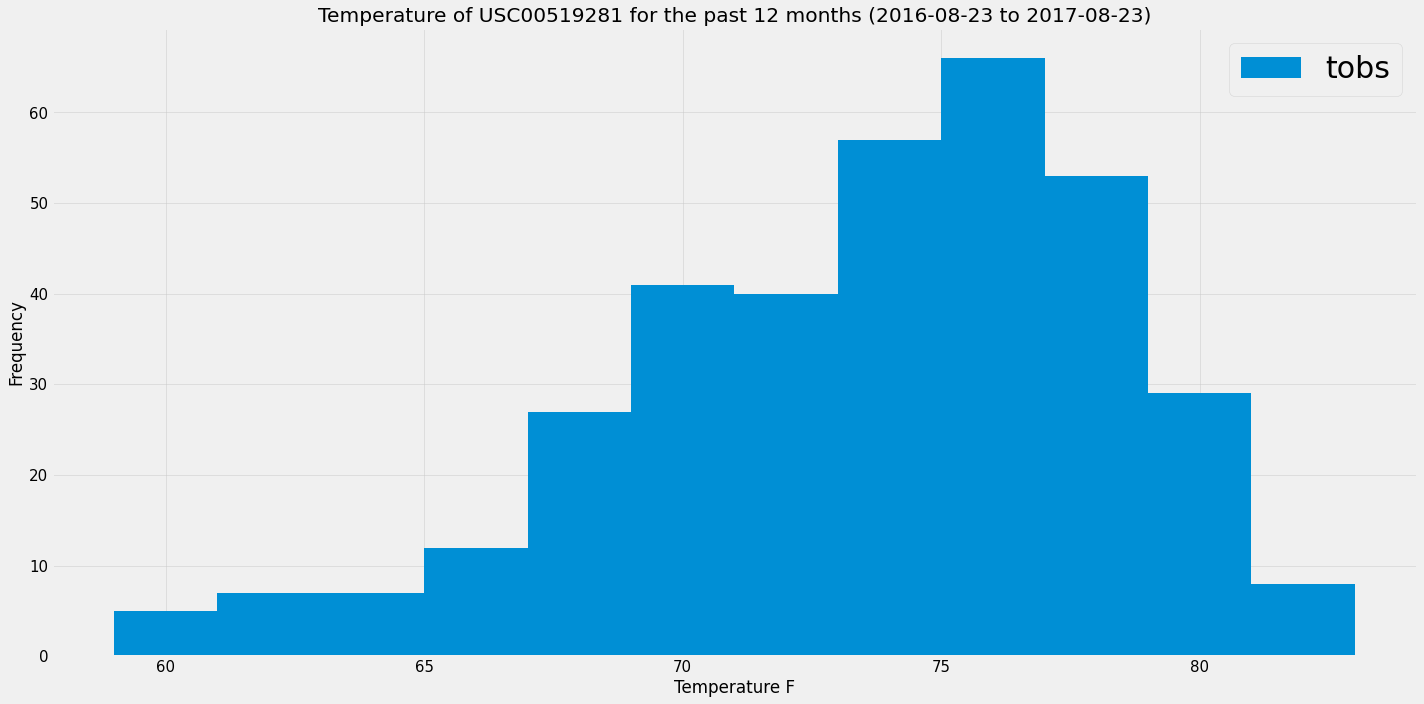

In [29]:
# Histogram plot
fig_temp = data_temperature_df.plot(kind='hist', bins=12, fontsize=15, figsize=(20,10))
#plt.hist(data_temperature_df['Temperature'], bins='auto', color='b', alpha=0.5)
plt.xlabel('Temperature F')
plt.ylabel('Frequency')
plt.title('Temperature of USC00519281 for the past 12 months (2016-08-23 to 2017-08-23)')
plt.grid(True, alpha = 0.5)

# Save an image of the chart and print it to the screen
plt.tight_layout()
plt.legend(loc='upper right', fontsize=30)
plt.savefig("../images/station_analysis.png")
plt.show()


# Close session

In [30]:
# Close Session
session.close()